# Introduction

Ceci est un notebook permettant de visualiser l'inflation du nombre de participants au SPIPOLL de sorte à affiner l'évolution des clusters dans le temps : l'augmentation des clusters pourrait être du en partie du à l'augmentation des bénévoles. 
On cherche donc à visualiser la potentielle augmentation des bénévoles au cours du temps. 
On se servira pour cela des user_id, numéros uniques et des dates de collection.

# Import dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./spipoll.csv")

C:\Users\guilts0300\AppData\Local\Temp\ipykernel_4924\35506862.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./spipoll.csv")


In [3]:
df.columns

Index(['collection_id', 'collection_nom', 'protocole_long', 'user_id',
       'plante_famille', 'plante_genre', 'plante_espece', 'plante_sc',
       'plante_fr', 'plante_precision', 'plante_inconnue', 'plante_caractere',
       'photo_fleur', 'photo_plante', 'photo_feuille', 'coordonnees_GPS',
       'code_postal', 'habitat', 'grande_culture', 'collection_date',
       'collection_heure_debut', 'nebulosite', 'temperature', 'vent',
       'fleur_ombre', 'insecte_ordre', 'insecte_super_famille',
       'insecte_famille', 'insecte_sous_famille', 'insecte_genre',
       'insecte_espece', 'insecte_sc', 'insecte_fr',
       'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref',
       'insecte_abondance', 'insecte_commentaire', 'insecte_vu_sur_fleur',
       'nb_validation', 'nb_suggestion'],
      dtype='object')

In [4]:
to_drop = ['collection_nom', 'protocole_long',
       'plante_famille', 'plante_genre', 'plante_espece', 'plante_sc',
       'plante_fr', 'plante_precision', 'plante_inconnue', 'plante_caractere',
       'photo_fleur', 'photo_plante', 'photo_feuille', 'coordonnees_GPS',
       'code_postal', 'habitat', 'grande_culture', 
       'collection_heure_debut', 'nebulosite', 'temperature', 'vent',
       'fleur_ombre', 'insecte_ordre', 'insecte_super_famille',
       'insecte_famille', 'insecte_sous_famille', 'insecte_genre',
       'insecte_espece', 'insecte_sc', 'insecte_fr',
       'insecte_denominationPlusPrecise', 'insecte_CdNomtaxref',
       'insecte_abondance', 'insecte_commentaire', 'insecte_vu_sur_fleur',
       'nb_validation', 'nb_suggestion']

In [5]:
df.drop(columns = to_drop, inplace = True)

In [6]:
# Garantir que collection_date est de type datetime
df['collection_date'] = pd.to_datetime(df['collection_date'])

# Extraction de l'année à partir de la date de collection
df['collection_year'] = df['collection_date'].dt.year

In [7]:
df = df[df['collection_year'] >= 2011]

# Plots

## Nombre d'users actifs

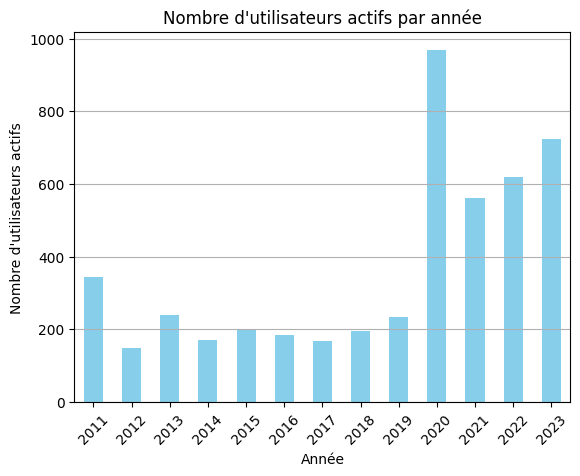

In [8]:
# Identification des utilisateurs actifs par année
active_users_per_year = df.groupby(['user_id', 'collection_year']).size().reset_index(name='count')
active_users_per_year = active_users_per_year.groupby('collection_year').size()

# Tracé du graphique
active_users_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre d\'utilisateurs actifs')
plt.title('Nombre d\'utilisateurs actifs par année')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Active users + observations

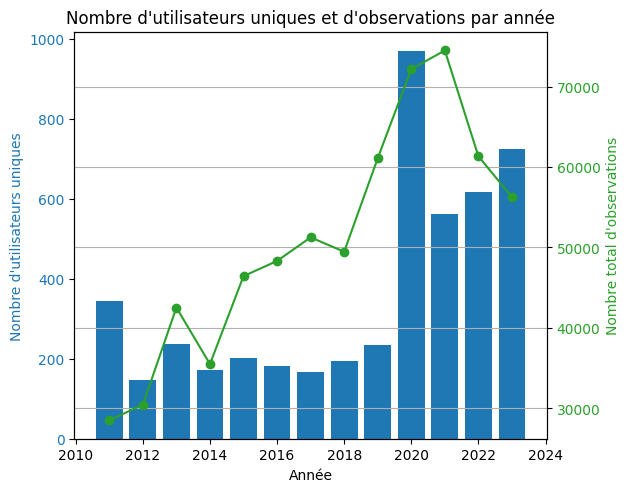

Tableau Récapitulatif :


,collection_year,unique_users,total_observations
0,2011,345,28518
1,2012,148,30445
2,2013,238,42524
3,2014,171,35498
4,2015,202,46435
5,2016,183,48322
6,2017,168,51256
7,2018,195,49468
8,2019,235,61095
9,2020,969,72181


In [9]:
# Comptage du nombre d'utilisateurs uniques par année
unique_users_per_year = df.groupby('collection_year')['user_id'].nunique().reset_index(name='unique_users')

# Comptage du nombre total de collections par année
collections_per_year = df.groupby('collection_year').size().reset_index(name='total_observations')

# Fusionner les données dans un DataFrame récapitulatif
summary_table = pd.merge(unique_users_per_year, collections_per_year, on='collection_year')

# Tracé du graphique
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Année')
ax1.set_ylabel('Nombre d\'utilisateurs uniques', color=color)
ax1.bar(summary_table['collection_year'], summary_table['unique_users'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Nombre total d\'observations', color=color)
ax2.plot(summary_table['collection_year'], summary_table['total_observations'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Nombre d\'utilisateurs uniques et d\'observations par année')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Affichage du tableau récapitulatif
print("Tableau Récapitulatif :")
summary_table


## Active users + observations + collections

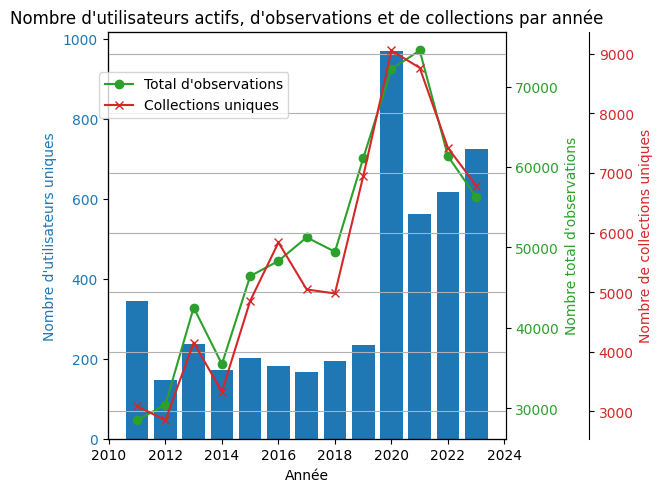

Tableau Récapitulatif :


,collection_year,active_users,total_observations,unique_collections
0,2011,345,28518,3088
1,2012,148,30445,2853
2,2013,238,42524,4155
3,2014,171,35498,3331
4,2015,202,46435,4854
5,2016,183,48322,5834
6,2017,168,51256,5046
7,2018,195,49468,4979
8,2019,235,61095,6942
9,2020,969,72181,9054


In [10]:
# Comptage du nombre d'utilisateurs uniques par année
unique_users_per_year = df.groupby('collection_year')['user_id'].nunique().reset_index(name='active_users')

# Comptage du nombre total de collections par année
total_collections_per_year = df.groupby('collection_year')['collection_id'].count().reset_index(name='total_observations')

# Comptage du nombre de collections uniques par année
unique_collections_per_year = df.groupby('collection_year')['collection_id'].nunique().reset_index(name='unique_collections')

# Fusionner les données dans un DataFrame récapitulatif
summary_table = pd.merge(unique_users_per_year, total_collections_per_year, on='collection_year')
summary_table = pd.merge(summary_table, unique_collections_per_year, on='collection_year')

# Tracé du graphique
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Année')
ax1.set_ylabel('Nombre d\'utilisateurs uniques', color=color)
ax1.bar(summary_table['collection_year'], summary_table['active_users'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Nombre total d\'observations', color=color)
ax2.plot(summary_table['collection_year'], summary_table['total_observations'], color=color, marker='o', label='Total d\'observations')
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
color = 'tab:red'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Nombre de collections uniques', color=color)
ax3.plot(summary_table['collection_year'], summary_table['unique_collections'], color=color, marker='x', label='Collections uniques')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.title('Nombre d\'utilisateurs actifs, d\'observations et de collections par année')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Affichage du tableau récapitulatif
print("Tableau Récapitulatif :")
summary_table


## Taux de croissance d'active_users

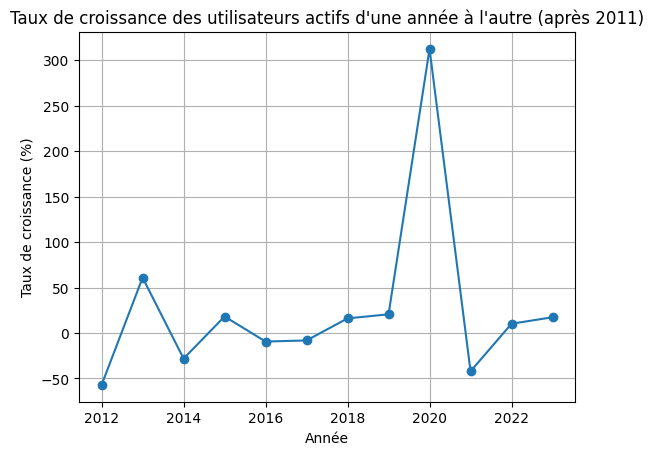

In [11]:
# Filtrer les données pour les années après 2011
df_after_2011 = df[df['collection_year'] >= 2011]

# Identification des utilisateurs actifs par année
active_users_per_year = df_after_2011.groupby(['collection_year', 'user_id']).size().reset_index(name='count')
active_users_per_year = active_users_per_year.groupby('collection_year').size().reset_index(name='active_users')

# Calcul du taux de croissance d'une année à l'autre
active_users_per_year['taux_de_croissance'] = active_users_per_year['active_users'].pct_change() * 100

# Tracer le taux de croissance
plt.plot(active_users_per_year['collection_year'][1:], active_users_per_year['taux_de_croissance'][1:], marker='o')
plt.xlabel('Année')
plt.ylabel('Taux de croissance (%)')
plt.title('Taux de croissance des utilisateurs actifs d\'une année à l\'autre (après 2011)')
plt.grid(True)
plt.show()


In [12]:
active_users_per_year

,collection_year,active_users,taux_de_croissance
0,2011,345,NaN
1,2012,148,-57.101449
2,2013,238,60.810811
3,2014,171,-28.151261
4,2015,202,18.128655
5,2016,183,-9.405941
6,2017,168,-8.196721
7,2018,195,16.071429
8,2019,235,20.512821
9,2020,969,312.340426


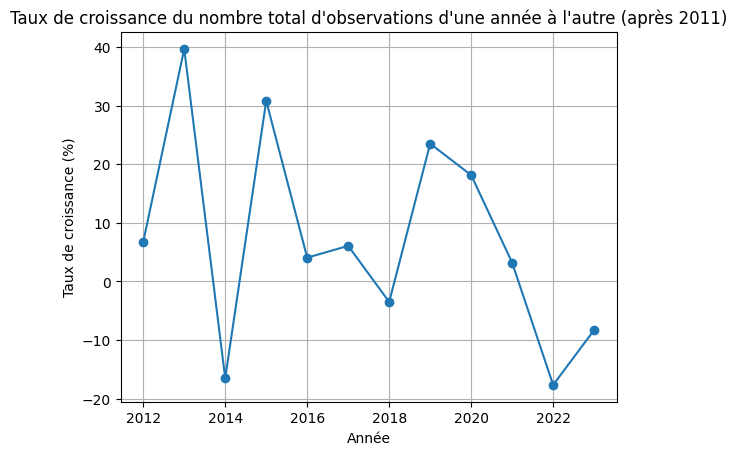

In [13]:
# Filtrer les données pour les années après 2011
df_after_2011 = df[df['collection_year'] >= 2011]

# Comptage du nombre total d'observations par année
observations_per_year = df_after_2011.groupby('collection_year').size().reset_index(name='total_observations')

# Calcul du taux de croissance d'une année à l'autre
observations_per_year['taux_de_croissance'] = observations_per_year['total_observations'].pct_change() * 100

# Tracer le taux de croissance
plt.plot(observations_per_year['collection_year'], observations_per_year['taux_de_croissance'], marker='o')
plt.xlabel('Année')
plt.ylabel('Taux de croissance (%)')
plt.title('Taux de croissance du nombre total d\'observations d\'une année à l\'autre (après 2011)')
plt.grid(True)
plt.show()


In [14]:
observations_per_year

,collection_year,total_observations,taux_de_croissance
0,2011,28518,NaN
1,2012,30445,6.757136
2,2013,42524,39.674823
3,2014,35498,-16.522434
4,2015,46435,30.810186
5,2016,48322,4.063745
6,2017,51256,6.071769
7,2018,49468,-3.488372
8,2019,61095,23.504083
9,2020,72181,18.145511


# Vérifications

In [45]:
# Filtrer le DataFrame pour l'année en question
df_annee = df[df['collection_year'] == 2011]

# Afficher les premières lignes du DataFrame filtré
print("Active_users : ", df_annee['user_id'].nunique())
print("Nombre de collections : ", df_annee['collection_id'].nunique())
print("Observations : ", len(df_annee))


Active_users :  345
Nombre de collections :  3088
Observations :  28518


# Problématique : affiner min_sample de DBSCAN 

La question est d'affiner min_sample (nombre d'insectes minimal pour former un cluster) dans l'utilisation de DBSCAN pour en partie prendre en compte l'augmentation de la base de données dans le nombre d'observations.

En effet, si lors d'une année on a très peu d'observations par rapport à une autre, le cluster aura tendance à disparaître entre ces deux années (du fait de min_sample inchangé entre les 2 années).

## Indexation de min_sample

On indexe min_sample sur le taux de croissance d'observations par années. Suite à l'exécution de DBSCAN pour l'année 2011 avec min_samples=500, on obtient 0 cluster. On a donc décidé d'abaisser min_sample à min_sample = 200 (cf graph du nombre de clusters en fonction de min_samples dans le notebook DBSCAN_adjusted_clustering_et_metriques).

In [15]:
# Fonction pour ajuster les valeurs de min_samples en fonction du taux de croissance
def ajuster_min_samples(taux_de_croissance, min_samples_base):
    min_samples_ajustes = [min_samples_base]
    for annee, taux in taux_de_croissance.items():
        min_sample = int(min_samples_base * (1 + (taux / 100)))
        min_samples_ajustes.append(min_sample)
    return min_samples_ajustes

# Valeur de base de min_samples
min_samples_base = 200

# Taux de croissance calculé
taux_de_croissance = observations_per_year['taux_de_croissance'][1:]

# Ajuster les valeurs de min_samples en fonction du taux de croissance annuel
min_samples_ajusted = ajuster_min_samples(taux_de_croissance, min_samples_base)
min_samples_ajusted

[200, 213, 279, 166, 261, 208, 212, 193, 247, 236, 206, 164, 183]

In [16]:
print("Longueur de la liste : ", len(min_samples_ajusted))
print("Nombre d'années : ", len(observations_per_year))

Longueur de la liste :  13
Nombre d'années :  13


In [96]:
observations_per_year[['collection_year', 'taux_de_croissance']]

,collection_year,taux_de_croissance
0,2011,NaN
1,2012,6.757136
2,2013,39.674823
3,2014,-16.522434
4,2015,30.810186
5,2016,4.063745
6,2017,6.071769
7,2018,-3.488372
8,2019,23.504083
9,2020,18.145511


In [101]:
summary_table

,collection_year,active_users,total_observations,unique_collections
0,2003,2,4,2
1,2004,4,16,5
2,2005,1,1,1
3,2006,2,4,3
4,2008,1,1,1
5,2009,7,36,11
6,2010,577,12852,2243
7,2011,345,28518,3088
8,2012,148,30445,2853
9,2013,238,42524,4155
